# Régression linéaire

CSI 4506 - automne 2025

Marcel Turcotte  
Version: août 29, 2025 10h46

# Préamble

## Citation du jour

![](https://cdn.openai.com/reasoning-evals/v2/headline-desktop.png?w=3840&q=90&fm=webp)

[OpenAI](https://openai.com) a publié [o1](https://openai.com/o1/) le 12
septembre 2024 : “o1 améliore considérablement GPT-4o sur les benchmarks
de raisonnement difficiles. Les barres pleines montrent la précision
pass@1 et la région ombrée montre la performance du vote majoritaire
(consensus) avec 64 échantillons.”

## Citation du jour (suite)

**Vidéos**:

-   [**Building** OpenAI
    o1](https://youtu.be/3k89FMJhZ00?si=6dYNDz6J8M64-CoJ)
-   [**Coding** with OpenAI
    o1](https://youtu.be/50W4YeQdnSg?si=gn1r1yCkOW8tECbi)
-   [Scott Wu: OpenAI o1 &
    **Coding**](https://www.youtube.com/watch?v=wyuZzLfDhD8)
-   [Catherine Brownstein:
    **Genetics**](https://www.youtube.com/watch?v=5rFzKdAdpOg&list=PLOXw6I10VTv_T9QV-DKXhq7HFUQRkGQLI&index=4)
-   [Mario Krenn: **Quantum
    Physics**](https://www.youtube.com/watch?v=OJo-SlzlwtI&list=PLOXw6I10VTv_T9QV-DKXhq7HFUQRkGQLI&index=12)
-   [OpenAI o1
    **playlist**](https://www.youtube.com/playlist?list=PLOXw6I10VTv_T9QV-DKXhq7HFUQRkGQLI)

Les vidéos de cette liste ont une durée comprise entre 1 m 17 s et 3 m
17 s.

## Entraînement d’un modèle linéaire

Dans ce cours, nous couvrirons les concepts fondamentaux de la
régression linéaire et de la descente de gradient.

Vous acquerrez une compréhension approfondie de ces techniques
essentielles d’apprentissage automatique, vous permettant de les
appliquer efficacement dans votre travail.

### Objectif général

-   **Expliquer** le processus d’entraînement d’un modèle linéaire

## Objectifs d’apprentissage

-   **Distinguer** entre les tâches de régression et de classification.
-   **Expliquer** le processus d’entraînement des modèles de régression
    linéaire.
-   **Expliquer** dans vos propres mots le rôle des algorithmes
    d’optimisation dans le contexte d’une régression linéaire.
-   **Décrire** le rôle des dérivées partielles dans l’algorithme de
    descente de gradient.
-   **Comparer** les algorithmes de descente de gradient **batch**,
    **stochastique** et **mini-batch**.

### Lectures

-   Basé sur Géron (2019), $\S$ 4.

# Problème

## Apprentissage supervisé - régression

-   Les **données d’entraînement** sont un ensemble d’exemples
    **étiquetés**.
    -   $\{(x_i, y_i)\}_{i=1}^N$
        -   Chaque $x_i$ est un **vecteur d’attributs** avec $D$
            dimensions.
        -   $x_i^{(j)}$ est la valeur de l’**attribut** $j$ de l’exemple
            $i$, pour $j \in 1 \ldots D$ et $i \in 1 \ldots N$.
    -   L’**étiquette** $y_i$ est un **nombre réel**.
-   **Problème** : Étant donné l’ensemble de données en entrée, créer un
    **modèle** qui peut être utilisé pour prédire la valeur de $y$ pour
    un $x$ non vu.

## k-plus-proches voisins

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_classification_001.png)

-   [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
    -   [examples](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html)
-   [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
    -   [exemples](https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html)

**Attribution**: Exemple tiré du site `scikit-learn`, page [Nearest
Neighbors
Classification](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html).

L’algorithme des $k$ plus proches voisins ($k$-NN) est une méthode
d’apprentissage simple, non paramétrique et basée sur les instances,
utilisée pour la classification et la régression. Il classe un point de
données en fonction de l’étiquette majoritaire de ses $k$ plus proches
voisins dans l’espace des attributs, où $k$ est une constante définie
par l’utilisateur. Des métriques de distance comme la distance
euclidienne sont couramment utilisées pour déterminer les plus proches
voisins.

Un algorithme **non paramétrique** ne fait aucune hypothèse sur la
distribution sous-jacente des données et n’apprend pas un ensemble fixe
de paramètres ou un modèle pendant la phase d’entraînement. Au lieu de
cela, il s’appuie directement sur les données d’entraînement pour
prendre des décisions au moment de la classification ou de la
régression, ce qui le rend flexible et adaptable à diverses formes de
données, mais potentiellement coûteux en termes de calcul au moment de
la prédiction.

Dans scikit-learn, plusieurs modèles sont couramment utilisés pour les
tâches de régression. Voici quelques-uns des principaux modèles :

1.  **Régression Linéaire** (`LinearRegression`) :
    -   Une approche linéaire simple qui modélise la relation entre les
        variables indépendantes et la variable dépendante en ajustant
        une équation linéaire aux données observées.
2.  **Régression à Vecteurs de Support** (`SVR`) :
    -   Une extension des Machines à Vecteurs de Support (SVM) pour les
        tâches de régression, qui essaie d’ajuster la meilleure ligne
        dans une marge de tolérance spécifiée.
3.  **Régression par Arbre de Décision** (`DecisionTreeRegressor`) :
    -   Utilise des arbres de décision pour modéliser la relation entre
        les caractéristiques d’entrée et la variable cible en divisant
        récursivement les données en sous-ensembles.
4.  **Régression par Forêt Aléatoire** (`RandomForestRegressor`) :
    -   Une méthode d’ensemble qui utilise plusieurs arbres de décision
        pour améliorer la précision prédictive et contrôler le
        surapprentissage.
5.  **Régression par Gradient Boosting** (`GradientBoostingRegressor`) :
    -   Une autre méthode d’ensemble qui construit des arbres de
        décision séquentiels, où chaque arbre corrige les erreurs du
        précédent.
6.  **Régression par les K-Plus Proches Voisins**
    (`KNeighborsRegressor`) :
    -   Une méthode non paramétrique qui prédit la variable cible en se
        basant sur la moyenne des k-plus proches voisins dans l’espace
        des caractéristiques.

Ces modèles offrent une gamme d’approches pour gérer différents types de
problèmes de régression, chacun avec ses propres forces et applications
adaptées.

## Justification

La **régression linéaire** est introduite pour présenter de manière
pratique un algorithme d’entraînement bien connu, la **descente de
gradient**. De plus, elle sert de base pour introduire la **régression
logistique**—un algorithme de classification—qui facilite davantage les
discussions sur les **réseaux de neurones artificiels**.

-   Régression linéaire
    -   Descente de gradient
    -   Régression logistique
        -   Réseaux de neurones

Les algorithmes d’entraînement pour les modèles d’apprentissage
automatique peuvent varier considérablement en fonction du modèle (par
exemple, les arbres de décision, les SVM, etc.). Afin de respecter notre
calendrier, nous nous concentrerons sur cette séquence spécifique.

Le concept de régression linéaire remonte aux travaux de Sir Francis
Galton à la fin du 19ème siècle. Galton a introduit l’idée de
“régression” dans son article de 1886, qui portait sur la relation entre
la taille des parents et celle de leurs enfants. Il a observé que la
taille des enfants avait tendance à régresser vers la moyenne, ce qui a
conduit au terme “régression”.

Cependant, la formulation mathématique de la régression linéaire est
étroitement associée aux travaux de Karl Pearson, qui au début du 20ème
siècle a étendu les idées de Galton pour créer la méthode des moindres
carrés pour ajuster un modèle linéaire. La méthode elle-même, cependant,
a été développée plus tôt en 1805 par Adrien-Marie Legendre et
indépendamment par Carl Friedrich Gauss pour l’analyse des données
astronomiques.

**Voir :** Stanton (2001).

## Apprentissage supervisé - régression

Pouvez-vous penser à des exemples de tâches de régression ?

. . .

1.  **Prédiction du Prix des Maisons** :

-   **Application** : Estimer la valeur marchande des propriétés
    résidentielles en fonction de caractéristiques telles que
    l’emplacement, la taille, le nombre de chambres, l’âge et les
    commodités.

1.  **Prévision du Marché Boursier** :

-   **Application** : Prédire les prix futurs des actions ou des indices
    basés sur des données historiques, des indicateurs financiers et des
    variables économiques.

1.  **Prédiction Météorologique** :

-   **Application** : Estimer les températures futures, les
    précipitations et autres conditions météorologiques en utilisant des
    données météorologiques historiques et des variables atmosphériques.

1.  **Prévision des Ventes** :

-   **Application** : Prédire les volumes de ventes futurs pour des
    produits ou services en analysant les données de ventes passées, les
    tendances du marché et les modèles saisonniers.

1.  **Prédiction de la Consommation d’Énergie** :

-   **Application** : Prévoir la consommation future d’énergie pour les
    ménages, les industries ou les villes en se basant sur des données
    de consommation historiques, les conditions météorologiques et les
    facteurs économiques.

1.  **Estimation des Coûts Médicaux** :

-   **Application** : Prédire les coûts des soins de santé pour les
    patients en fonction de leur historique médical, des informations
    démographiques et des plans de traitement.

1.  **Prédiction du Flux de Trafic** :

-   **Application** : Estimer les volumes de trafic futurs et les
    niveaux de congestion sur les routes et autoroutes en utilisant des
    données historiques de trafic et des entrées de capteurs en temps
    réel.

1.  **Estimation de la Valeur à Vie du Client (CLV)** :

-   **Application** : Prédire le revenu total qu’une entreprise peut
    attendre d’un client sur la durée de leur relation, en se basant sur
    le comportement d’achat et les données démographiques.

1.  **Prévision des Indicateurs Économiques** :

-   **Application** : Prédire les indicateurs économiques clés tels que
    la croissance du PIB, les taux de chômage et l’inflation en
    utilisant des données économiques historiques et les tendances du
    marché.

1.  **Prévision de la Demande** :

-   **Application** : Estimer la demande future de produits ou services
    dans diverses industries comme le commerce de détail, la fabrication
    et la logistique pour optimiser la gestion des stocks et de la
    chaîne d’approvisionnement.

1.  **Évaluation Immobilière** :

-   **Application** : Évaluer la valeur marchande des propriétés
    commerciales telles que les immeubles de bureaux, les centres
    commerciaux et les espaces industriels en fonction de l’emplacement,
    de la taille et des conditions du marché.

1.  **Évaluation des Risques d’Assurance** :

-   **Application** : Prédire le risque associé à l’assurance des
    individus ou des propriétés, ce qui aide à déterminer les taux de
    prime, en se basant sur les données historiques de sinistres et les
    facteurs démographiques.

1.  **Prédiction du Taux de Clics sur les Publicités (CTR)** :

-   **Application** : Estimer la probabilité qu’un utilisateur clique
    sur une publicité en ligne en fonction du comportement de
    l’utilisateur, des caractéristiques de la publicité et des facteurs
    contextuels.

1.  **Prédiction du Risque de Défaut de Prêt** :

-   **Application** : Prédire la probabilité qu’un emprunteur fasse
    défaut sur un prêt en fonction de l’historique de crédit, du revenu,
    du montant du prêt et d’autres indicateurs financiers.

## Apprentissage supervisé - régression

En se concentrant sur des applications pouvant fonctionner sur un
appareil mobile.

. . .

1.  **Prédiction de l’Autonomie de la Batterie** :

-   **Application** : Estimer l’autonomie restante de la batterie en
    fonction des habitudes d’utilisation, des applications en cours
    d’exécution et des paramètres de l’appareil.

1.  **Suivi de la Santé et de la Condition Physique** :

-   **Application** : Prédire la dépense calorique, la fréquence
    cardiaque ou la qualité du sommeil en fonction de l’activité de
    l’utilisateur, des données biométriques et des données de santé
    historiques.

1.  **Gestion des Finances Personnelles** :

-   **Application** : Prévoir les dépenses ou économies futures en
    fonction des habitudes de dépense, des modèles de revenu et des
    objectifs budgétaires.

1.  **Prévision Météorologique** :

-   **Application** : Fournir des prévisions météorologiques
    personnalisées en fonction de la localisation actuelle et des
    données météorologiques historiques.

1.  **Estimation du Temps de Trajet et du Trafic** :

-   **Application** : Prédire les temps de trajet et suggérer des
    itinéraires optimaux en fonction des données de trafic historiques,
    des conditions en temps réel et du comportement de l’utilisateur.

1.  **Amélioration de la Qualité des Images et Vidéos** :

-   **Application** : Ajuster les paramètres de qualité des images ou
    vidéos (par exemple, luminosité, contraste) en fonction des
    conditions d’éclairage et des préférences de l’utilisateur.

1.  **Atteinte des Objectifs de Condition Physique** :

-   **Application** : Estimer le temps nécessaire pour atteindre des
    objectifs de condition physique tels que la perte de poids ou le
    gain musculaire en fonction de l’activité de l’utilisateur et des
    apports alimentaires.

1.  **Optimisation des Performances des Appareils Mobiles** :

-   **Application** : Prédire les paramètres optimaux pour les
    performances de l’appareil et la durée de vie de la batterie en
    fonction des habitudes d’utilisation et de l’activité des
    applications.

------------------------------------------------------------------------

<https://youtu.be/qxo8p8PtFeA?si=Buy1DF-T1qPsVE2S>

## Régression linéaire

-   Un **modèle linéaire** suppose que la valeur de l’étiquette,
    $\hat{y_i}$, peut être exprimée comme une **combinaison linéaire**
    des valeurs des attributs, $x_i^{(j)}$ : $$
    \hat{y_i} = h(x_i) = \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)}
    $$
-   Ici, $\theta_{j}$ est le $j$-ième paramètre du **modèle**
    (linéaire), avec $\theta_0$ étant le terme/le paramètre de
    **biais**, et $\theta_1 \ldots \theta_D$ étant les **poids des
    attributs**.

## Régression Linéaire (suite)

**Problème** : trouver des valeurs pour tous les paramètres du modèle
afin que le modèle **s’ajuste au mieux** aux données d’entraînement.

. . .

-   **L’erreur quadratique moyenne racine** (*root mean square error
    (RMSE)*) est une mesure de performance courante pour les problèmes
    de régression.

$$
\sqrt{\frac{1}{N}\sum_1^N [h(x_i) - y_i]^2}
$$

## Régression linéaire

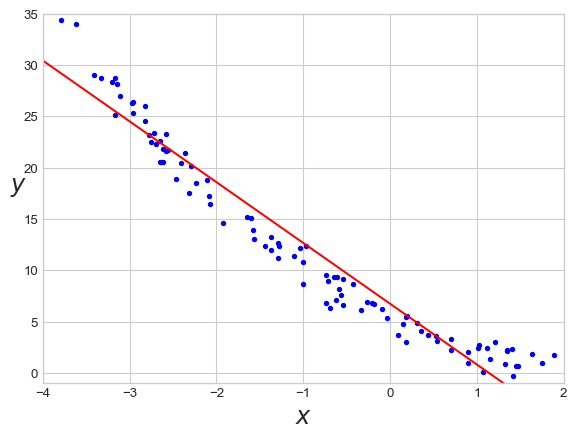

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

Ici, nous examinons un modèle simple impliquant une seule variable.

## Code source

In [3]:
import numpy as np

X = 6 * np.random.rand(100, 1) - 4
y = X ** 2 - 4 * X + 5 + np.random.randn(100, 1)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_new = np.array([[-4], [2]])
y_pred = lin_reg.predict(X_new)

Cet écran contient une anomalie. Pouvez-vous l’identifier ?

Les données ont été générées à partir d’un modèle quadratique,
$x^2 - 4x + 5$, avec du bruit gaussien ajouté pour rendre les données
synthétiques plus réalistes.

Cet exemple illustre que, dans la pratique, nous avons souvent une
connaissance limitée du modèle sous-jacent qui a généré les données.

Malgré cette incertitude, nous faisons des hypothèses—dans ce cas, en
supposant la linéarité—lors de la construction de nos modèles.

Plus tard, nous nous référerons à cela comme **biais** (distinct du
paramètre de biais dans notre modèle de régression). Le biais et la
variance influencent tous deux la performance de nos modèles.

## Interactions GPT 4o (2024-09-14)

**Utilisateur** : Expliquez le code sur l’écran précédent ligne par
ligne.

. . .

**IA** : Certainement ! Voici une explication ligne par ligne du code
fourni :

In [4]:
import numpy as np

-   **Explication** : Cette ligne importe la bibliothèque NumPy, qui est
    un paquet fondamental pour les calculs numériques en Python. Elle
    est couramment utilisée pour travailler avec des tableaux et des
    matrices, ainsi que pour effectuer diverses opérations
    mathématiques.

In [5]:
X = 6 * np.random.rand(100, 1) - 4

-   **Explication** : Cette ligne génère un tableau NumPy `X` contenant
    100 lignes et 1 colonne de nombres aléatoires. La fonction
    `np.random.rand(100, 1)` génère des nombres aléatoires uniformément
    distribués entre 0 et 1. La multiplication par 6 ajuste ces nombres
    à la plage \[0, 6), et la soustraction de 4 déplace la plage à \[-4,
    2).

In [6]:
y = X ** 2 - 4 * X + 5 + np.random.randn(100, 1)

-   **Explication** : Cette ligne génère la variable cible `y` basée sur
    une équation quadratique avec du bruit ajouté. Plus précisément :

    -   `X ** 2` calcule le carré de chaque élément de `X`.
    -   `- 4 * X` soustrait quatre fois chaque élément de `X`.
    -   `+ 5` ajoute une constante de 5.
    -   `+ np.random.randn(100, 1)` ajoute du bruit gaussien avec une
        moyenne de 0 et un écart-type de 1 à chaque élément, rendant les
        données plus réalistes en introduisant une certaine variabilité.

In [7]:
from sklearn.linear_model import LinearRegression

-   **Explication** : Cette ligne importe la classe `LinearRegression`
    du module `sklearn.linear_model`, qui fait partie de la bibliothèque
    Scikit-Learn. Scikit-Learn est largement utilisée pour
    l’apprentissage automatique en Python.

In [8]:
lin_reg = LinearRegression()

-   **Explication** : Cette ligne crée une instance de la classe
    `LinearRegression` et l’assigne à la variable `lin_reg`. Cet objet
    sera utilisé pour ajuster le modèle de régression linéaire aux
    données.

In [9]:
lin_reg.fit(X, y)

-   **Explication** : Cette ligne ajuste le modèle de régression
    linéaire aux données en trouvant la meilleure ligne passant par les
    points `(X, y)`. La méthode `fit` entraîne le modèle en utilisant
    les caractéristiques fournies `X` et la variable cible `y`.

In [10]:
X_new = np.array([[-4], [2]])

-   **Explication** : Cette ligne crée un nouveau tableau NumPy `X_new`
    avec deux valeurs : -4 et 2. Ces valeurs représentent de nouveaux
    points de données pour lesquels nous voulons prédire la variable
    cible en utilisant le modèle entraîné.

In [11]:
y_pred = lin_reg.predict(X_new)

-   **Explication** : Cette ligne utilise le modèle de régression
    linéaire entraîné pour prédire la variable cible `y_pred` pour les
    nouveaux points de données dans `X_new`. La méthode `predict`
    renvoie les valeurs prédites basées sur le modèle ajusté.

En résumé, ce script génère des données synthétiques, ajuste un modèle
de régression linéaire à ces données, puis utilise le modèle pour faire
des prédictions sur de nouveaux points de données.

## Source code (continued)

In [12]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Source code (continued)

In [13]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-4, 2, -1, 35])
save_fig("regression_linear-01")
plt.show()

## Andrew Ng

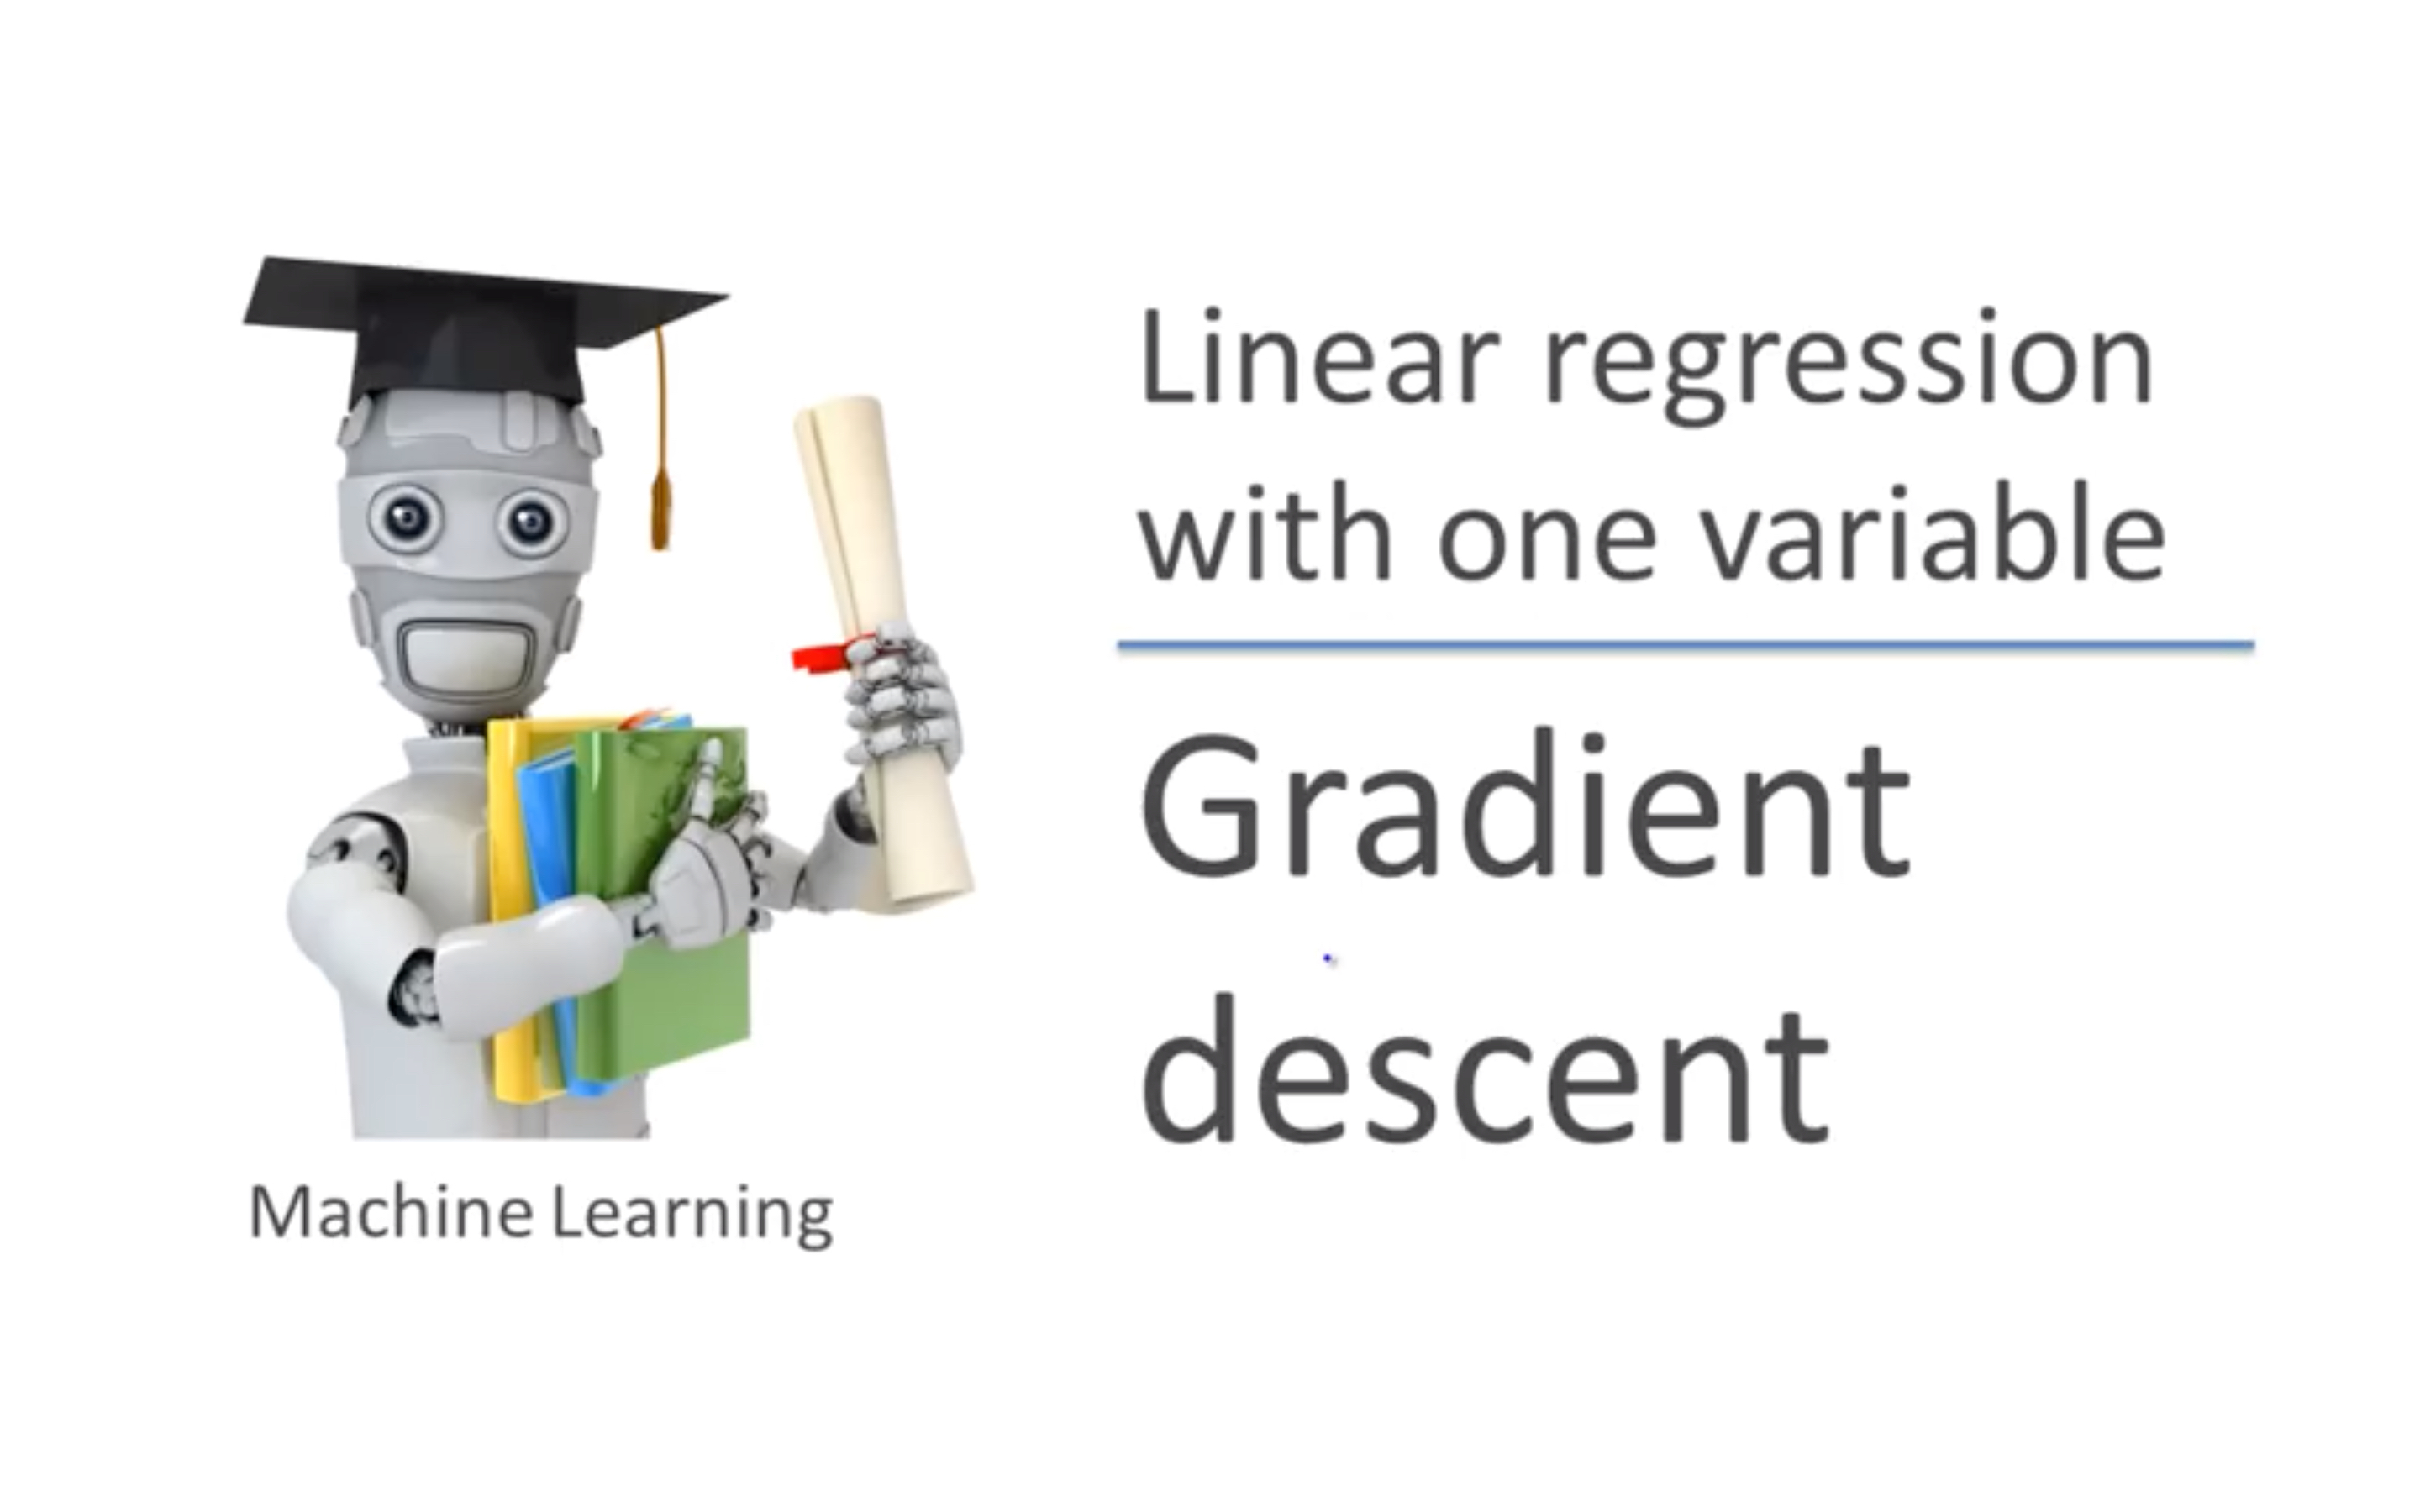

-   [Gradient Descent
    (Math)](https://youtu.be/sOou4izGINg?si=_Fz1V1tbGk8usJR0) <br/>
    (11:30 m)
-   [Intuition](https://youtu.be/DS83GeqWQqs?si=kOfDpHT_4t8hl_YL)
    <br/>(11:51 m)
-   [Linear
    Regression](https://www.youtube.com/watch?v=nOMy9LIcIkI&list=PLb0Gp98iu3OyY9zWJfSMq26nmkNKztNhA&index=6)
    <br/>(10:20 m)
-   [ML-005 \| Stanford \| Andrew
    Ng](https://www.youtube.com/playlist?list=PLoR5VjrKytrCv-Vxnhp5UyS1UjZsXP0Kj)<br/>
    (19 videos)

[Andrew Ng](https://www.andrewng.org) présente l’algorithme de descente
de gradient en utilisant une régression linéaire avec une variable.

Andrew Ng est le fondateur de
[DeepLearning.AI](https://www.deeplearning.ai/), fondateur et PDG de
[Landing AI](https://landing.ai/), partenaire général chez [AI
Fund](https://aifund.ai/), président et cofondateur de
[Coursera](https://www.coursera.org/) et professeur au département
d’informatique de l’Université de Stanford.

Ng a également été cofondateur et responsable de [Google
Brain](https://en.wikipedia.org/wiki/Google_Brain "Google Brain") et a
été l’ancien scientifique en chef chez
[Baidu](https://en.wikipedia.org/wiki/Baidu "Baidu").

# Mathématiques

## 3Blue1Brown

-   [Essence de **l’algèbre
    linéaire**](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
    -   Une série de 16 vidéos (10 à 15 minutes par vidéo) offrant “une
        compréhension géométrique des matrices, déterminants, valeurs
        propres et plus encore.”
        -   6 662 732 vues au 30 septembre 2019.
-   [Essence du
    **calcul**](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr)
    -   Une série de 12 vidéos (15 à 20 minutes par vidéo) : “L’objectif
        ici est de faire en sorte que le calcul apparaisse comme quelque
        chose que vous auriez pu découvrir vous-même.”
        -   2 309 726 vues au 30 septembre 2019.

# Problème (prise 2)

## Apprentissage supervisé - régression

-   Les **données d’entraînement** sont un ensemble d’exemples
    **étiquetés**.
    -   $\{(x_i, y_i)\}_{i=1}^N$
        -   Chaque $x_i$ est un **vecteur d’attributs** avec $D$
            dimensions.
        -   $x_i^{(j)}$ est la valeur de l’**attribut** $j$ de l’exemple
            $i$, pour $j \in 1 \ldots D$ et $i \in 1 \ldots N$.
    -   L’**étiquette** $y_i$ est un **nombre réel**.
-   **Problème** : Étant donné l’ensemble de données en entrée, créer un
    **modèle** qui peut être utilisé pour prédire la valeur de $y$ pour
    un $x$ non vu.

# Composants fondamentaux

## Composants fondamentaux

Un **algorithme d’apprentissage** typique comprend les composants
suivants :

1.  Un **modèle**, souvent constitué d’un ensemble de **poids** dont les
    valeurs seront **“apprises”**.

2.  Une **fonction objectif**.

    -   Dans le cas de la **régression**, il s’agit souvent d’une
        **fonction de perte**, (*loss function*) une fonction qui
        quantifie les erreurs de classification. L’**erreur quadratique
        moyenne racine** (*root mean square error (RMSE)*) est une
        fonction de perte courante pour les problèmes de régression. $$
        \sqrt{\frac{1}{N}\sum_1^N [h(x_i) - y_i]^2}
        $$

3.  Un algorithme d’**optimisation**

## Optimisation

**Jusqu’à** ce que certains critères d’arrêt soient atteints$^1$ :

-   **Évaluer** la fonction de perte, en comparant $h(x_i)$ à $y_i$.

-   **Apporter de petites modifications aux poids**, de manière à
    réduire la valeur de la fonction de perte.

1: Par exemple, la valeur de la **fonction de perte ne diminue plus** ou
le **nombre maximal d’itérations** est atteint.

## Dérivée

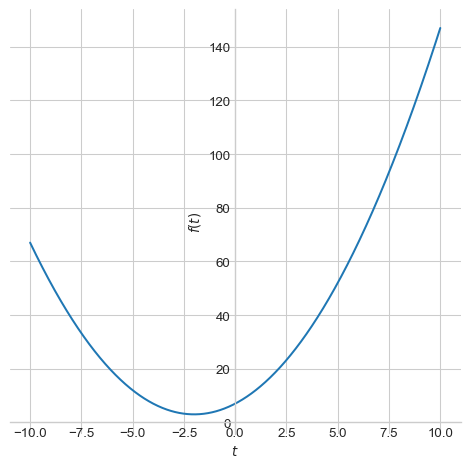

-   Nous commencerons par une **fonction à une variable**.
-   Considérez cela comme notre **fonction de perte**, que nous visons à
    minimiser; pour réduire la disparité moyenne entre les valeurs
    attendues et les valeurs prédites.
-   J’utilise le symbol $t$ pour la variable afin d’éviter toute
    confusion avec les attributs des exemples de notre jeu de données.

## Code source

In [15]:
from sympy import *

t = symbols('t')

f = t**2 + 4*t + 7

plot(f)

Sur l’écran précédent, j’ai utilisé [**SymPy**](https://www.sympy.org/),
une bibliothèque pour les **mathématiques symboliques**.

## Dérivée

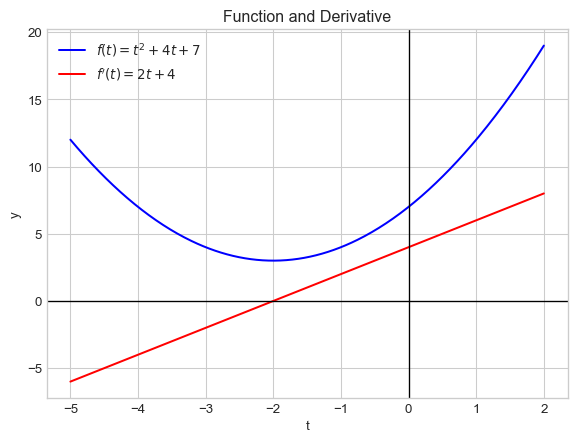

-   Le graphe de la **dérivée**, $f^{'}(t)$, est représenté en
    **rouge**.

-   La **dérivée** indique comment les changements dans l’entrée
    affectent la sortie, $f(t)$.

-   La magnitude de la **dérivée** en $t = -2$ est $0$.

-   Ce point correspond au **minimum** de notre fonction.

Près de $t = -2$, les variations de $t$ ont un impact minimal sur la
variable de sortie $y$.

## Dérivée

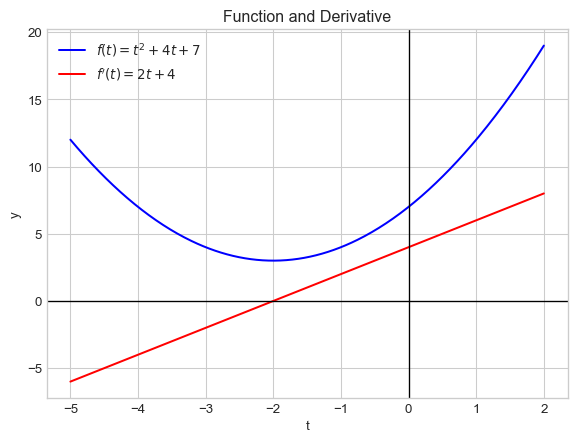

-   Lorsqu’elle est évaluée en un **point spécifique**, la dérivée
    indique la **pente** de la **ligne tangente** au graphe de la
    fonction à ce point.

-   À $t= -2$, la **pente** de la **ligne tangente** est de 0.

## Dérivée

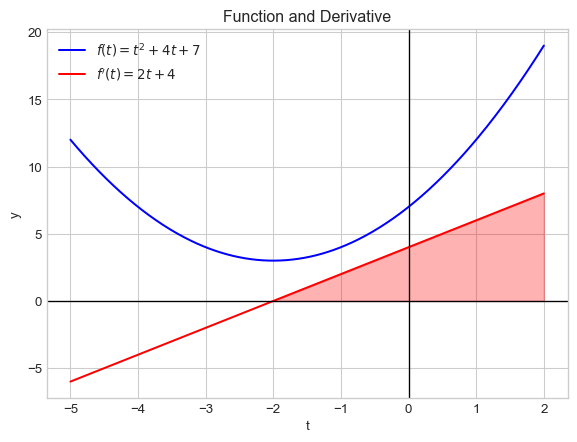

-   Une **dérivée positive** indique qu’**augmenter la variable
    d’entrée** entraînera une **augmentation de la valeur de sortie**.

-   De plus, la **magnitude** de la dérivée quantifie la **rapidité** du
    changement de la sortie.

## Dérivée

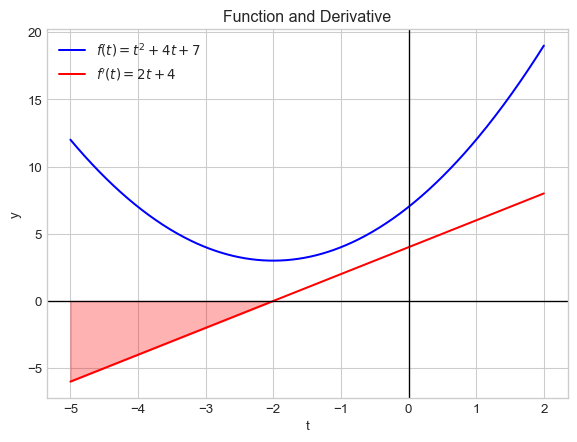

-   Une **dérivée négative** indique qu’**augmenter la variable
    d’entrée** entraînera une **diminution de la valeur de sortie**.

-   De plus, la **magnitude** de la dérivée quantifie la **rapidité** du
    changement de la sortie.

## Code source

In [20]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the variable and function
t = sp.symbols('t')
f = t**2 + 4*t + 7

# Compute the derivative
f_prime = sp.diff(f, t)

# Lambdify the functions for numerical plotting
f_func = sp.lambdify(t, f, "numpy")
f_prime_func = sp.lambdify(t, f_prime, "numpy")

# Generate t values for plotting
t_vals = np.linspace(-5, 2, 400)

# Get y values for the function and its derivative
f_vals = f_func(t_vals)
f_prime_vals = f_prime_func(t_vals)

# Plot the function and its derivative
plt.plot(t_vals, f_vals, label=r'$f(t) = t^2 + 4t + 7$', color='blue')
plt.plot(t_vals, f_prime_vals, label=r"$f'(t) = 2t + 4$", color='red')

# Fill the area below the derivative where it's negative
plt.fill_between(t_vals, f_prime_vals, where=(f_prime_vals > 0), color='red', alpha=0.3)

# Add labels and legend
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Function and Derivative')
plt.tlabel('t')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## Rappel

-   Un **modèle linéaire** suppose que la valeur de l’étiquette,
    $\hat{y_i}$, peut être exprimée comme une **combinaison linéaire**
    des valeurs des attributs, $x_i^{(j)}$ : $$
    \hat{y_i} = h(x_i) = \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)}
    $$
-   Ici, $\theta_{j}$ est le $j$ème paramètre du **modèle** (linéaire),
    avec $\theta_0$ étant le terme/paramètre de **biais**, et
    $\theta_1 \ldots \theta_D$ étant les **poids des attributs**.

## Rappel

-   L’**erreur quadratique moyenne racine** (**RMSE**) est une fonction
    de perte courante pour les problèmes de régression. $$
    \sqrt{\frac{1}{N}\sum_1^N [h(x_i) - y_i]^2}
    $$
-   En pratique, minimiser l’**erreur quadratique moyenne** (**MSE**)
    est plus facile et donne le même résultat. $$
    \frac{1}{N}\sum_1^N [h(x_i) - y_i]^2
    $$

## Descente de gradient - intuition

<https://youtu.be/i62czvwDlsw>

## Descente de gradient - une variable

-   Notre **modèle** : $$
    h(x_i) = \theta_0 + \theta_1 x_i^{(1)}
    $$
-   Notre **fonction de perte** : $$
    J(\theta_0, \theta_1) = \frac{1}{N}\sum_1^N [h(x_i) - y_i]^2
    $$
-   **Problème** : trouver les valeurs de $\theta_0$ et $\theta_1$ qui
    minimisent $J$.

## Descente de gradient - une variable

-   **Initialisation :** $\theta_0$ et $\theta_1$ - soit avec des
    valeurs aléatoires, soit avec des zéros.
-   **Boucle :**
-   répéter jusqu’à convergence : $$
    \theta_j := \theta_j - \alpha \frac {\partial}{\partial \theta_j}J(\theta_0, \theta_1) , \text{pour } j=0 \text{ et } j=1
    $$
-   $\alpha$ est appelé le **taux d’apprentissage** - c’est la taille de
    chaque pas.
-   $\frac {\partial}{\partial \theta_j}J(\theta_0, \theta_1)$ est la
    **dérivée partielle** par rapport à $\theta_j$.

Une **dérivée partielle** représente le taux de changement d’une
fonction multivariable **par rapport à l’une de ses variables**, tout en
**gardant les autres variables constantes**.

Pour que l’algorithme soit mathématiquement valide, tous les $\theta_j$
doivent être mis à jour **simultanément**.

## Dérivées partielles

Étant donnée

$$
J(\theta_0, \theta_1) = \frac{1}{N}\sum_1^N [h(x_i) - y_i]^2 = \frac{1}{N}\sum_1^N [\theta_0 + \theta_1 x_i - y_i]^2
$$

. . .

Nous avons

$$
\frac {\partial}{\partial \theta_0}J(\theta_0, \theta_1) = \frac{2}{N} \sum\limits_{i=1}^{N} (\theta_0 - \theta_1 x_i - y_{i})
$$

. . .

et

$$
\frac {\partial}{\partial \theta_1}J(\theta_0, \theta_1) = \frac{2}{N} \sum\limits_{i=1}^{N} x_{i} \left(\theta_0 + \theta_1 x_i - y_{i}\right)
$$

## Dérivée partielle (SymPy)

In [21]:
from IPython.display import Math, display
from sympy import *

# Define the symbols

theta_0, theta_1, x_i, y_i = symbols('theta_0 theta_1 x_i y_i')

# Define the hypothesis function:

h = theta_0 + theta_1 * x_i

print("Hypothesis function:")

display(Math('h(x) = ' + latex(h)))

Hypothesis function:

## Dérivée partielle (SymPy)

In [22]:
N = Symbol('N', integer=True)

# Define the loss function (mean square error)

J = (1/N) * Sum((h - y_i)**2, (x_i, 1, N))

print("Loss function:")

display(Math('J = ' + latex(J)))

Loss function:

## Dérivée partielle (SymPy)

In [23]:
# Calculate the partial derivative with respect to theta_0

partial_derivative_theta_0 = diff(J, theta_0)

print("Partial derivative with respect to theta_0:")

display(Math(latex(partial_derivative_theta_0)))

Partial derivative with respect to theta_0:

## Dérivée partielle (SymPy)

In [24]:
# Calculate the partial derivative with respect to theta_1

partial_derivative_theta_1 = diff(J, theta_1)

print("Partial derivative with respect to theta_1:")

display(Math(latex(partial_derivative_theta_1)))

Partial derivative with respect to theta_1:

## Régression linéaire multivariée

$$
h(x_i) = \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \theta_3 x_i^{(3)} + \cdots + \theta_D x_i^{(D)}
$$

$$
\begin{align*}
x_i^{(j)} &= \text{valeur de l'attribut } j \text{ dans le } i \text{ème exemple} \\
D &= \text{le nombre d'attributs'}
\end{align*}
$$

## Descente de gradient - multivariée

La nouvelle **fonction de perte** est

$$
J(\theta_0, \theta_1, \ldots, \theta_D) = \dfrac {1}{N} \displaystyle \sum _{i=1}^N \left( h(x_{i}) - y_i \right)^2
$$

Sa **dérivée partielle** :

$$
\frac {\partial}{\partial \theta_j}J(\theta) = \frac{2}{N} \sum\limits_{i=1}^N x_i^{(j)} \left( \theta x_i - y_i \right)
$$

**où** $\theta$, $x_i$ et $y_i$ sont des vecteurs, et $\theta x_i$ est
une opération vectorielle !

## Vecteur gradient

Le vecteur contenant la dérivée partielle de $J$ (par rapport à
$\theta_j$, pour $j \in \{0, 1 \ldots D\}$) est appelé le **vecteur
gradient**.

$$
\nabla_\theta J(\theta) = \begin{pmatrix}
\frac {\partial}{\partial \theta_0}J(\theta) \\
\frac {\partial}{\partial \theta_1}J(\theta) \\
\vdots \\
\frac {\partial}{\partial \theta_D}J(\theta)\\
\end{pmatrix}
$$

. . .

-   Ce vecteur donne la direction de la **plus forte pente ascendante**.
-   Il donne son nom à l’algorithme de **descente de gradient** :

$$
\theta' = \theta - \alpha \nabla_\theta J(\theta)
$$

## Descente de gradient - multivariée

L’algorithme de descente de gradient devient :

**Répétez jusqu’à convergence :**

$$
\begin{aligned}
\{ & \\
\theta_j := & \theta_j - \alpha \frac {\partial}{\partial \theta_j}J(\theta_0, \theta_1, \ldots, \theta_D) \\
& \text{pour } j \in [0, \ldots, D] \textbf{ (mettre à jour simultanément)} \\
\} &
\end{aligned}
$$

## Descente de gradient - multivariée

**Répétez jusqu’à convergence :**

$$
\begin{aligned}
\; \{ & \\
\; & \theta_0 := \theta_0 - \alpha \frac{2}{N} \sum\limits_{i=1}^{N} x^{0}_i(h(x_i) - y_i) \\
\; & \theta_1 := \theta_1 - \alpha \frac{2}{N} \sum\limits_{i=1}^{N} x^{1}_i(h(x_i) - y_i) \\
\; & \theta_2 := \theta_2 - \alpha \frac{2}{N} \sum\limits_{i=1}^{N} x^{2}_i(h(x_i) - y_i) \\
& \cdots \\
\} &
\end{aligned}
$$

## Hypothèses

Quelles étaient nos **hypothèses** ?

. . .

-   La fonction (objectif/de perte) est **différentiable**.

## Local vs global

-   Une fonction est **convexe** si pour toute paire de points sur le
    graphe de la fonction, la ligne reliant ces deux points se trouve
    au-dessus ou sur le graphe.

-   Une fonction **convexe** possède un **unique** minimum.

-   La fonction de perte pour la régression linéaire (MSE) est convexe.

-   Pour les fonctions qui ne sont pas convexes, l’algorithme de
    descente de gradient converge vers un minimum **local**.

-   Les fonctions de perte généralement utilisées avec les régressions
    linéaires ou logistiques, et les Support Vector Machines (SVM) sont
    convexes, mais pas celles pour les réseaux de neurones artificiels.

Une fonction serait convexe vers le bas ou concave si ces lignes se
trouvaient en dessous ou sur le graphe de la fonction.

## Local vs global

![](https://upload.wikimedia.org/wikipedia/commons/1/1e/Extrema_example.svg)

**Attribution :**
[commons.wikimedia.org/wiki/File:Extrema_example.svg](https://commons.wikimedia.org/wiki/File:Extrema_example.svg)

## Taux d’apprentissage

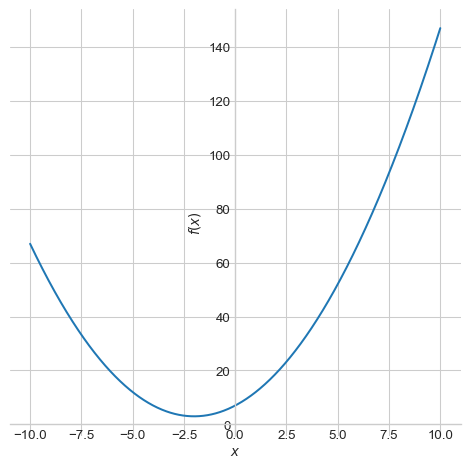

-   **Petits pas**, des valeurs faibles pour $\alpha$, feront que
    l’algorithme **convergera lentement**.
-   **Grands pas** pourraient faire diverger l’algorithme.
-   Remarquez comment l’algorithme **ralentit** naturellement en
    approchant d’un minimum.

## Descente de gradient par lot (*batch*)

-   Pour être plus précis, cet algorithme est connu sous le nom de
    **descente de gradient par lot** car à chaque itération, il traite
    le “lot entier” d’exemples d’apprentissage.

. . .

-   La littérature suggère que l’algorithme pourrait mettre plus de
    temps à converger si les attributs sont sur des échelles
    différentes.

## Descente de gradient par lot - inconvénient

-   L’algorithme de **descente de gradient par lot** devient très
    **lent** à mesure que le **nombre d’exemples d’apprentissage
    augmente**.

. . .

-   Cela est dû au fait que **toutes** les données d’apprentissage sont
    vues à **chaque itération**. L’algorithme est généralement exécuté
    pour un nombre fixe d’itérations, disons 1000.

## Descente de gradient stochastique

L’algorithme de **descente de gradient stochastique** sélectionne
aléatoirement **un** exemple d’apprentissage pour calculer son gradient.

``` python
epochs = 10
for epoch in range(epochs):
    for i in range(N):
        selection = np.random.randint(N)
        # Calculate the gradient using selection
        # Update the weights
```

-   Cela lui permet de fonctionner avec de grands ensembles
    d’apprentissage.
-   Sa trajectoire n’est pas aussi régulière que l’algorithme par lot.
-   En raison de sa trajectoire accidentée, il est souvent meilleur pour
    trouver les **minima globaux** par rapport à l’algorithme par lot.
-   Sa trajectoire accidentée le fait rebondir autour des minima locaux.

Pour atténuer le problème d’oscillation autour des minima locaux, il est
conseillé de réduire progressivement le taux d’apprentissage à mesure
que le nombre d’époques augmente. Cette technique, connue sous le nom de
**planning d’apprentissage**, aide à atteindre une convergence plus
stable.

Il est important que les exemples soient **sélectionnés aléatoirement**
ou **mélangés** avant d’exécuter l’algorithme pour s’assurer que
l’algorithme converge vers les minima globaux.

## Descente de gradient par mini-lots

-   À chaque étape, plutôt que de sélectionner un exemple
    d’apprentissage comme le fait la SGD, la **descente de gradient par
    mini-lots** (*mini-batch*) sélectionne aléatoirement un **petit
    nombre** d’exemples d’apprentissage pour calculer les gradients.
-   Sa trajectoire est plus régulière comparée à la SGD.
-   À mesure que la taille des mini-lots augmente, l’algorithme devient
    de plus en plus similaire à la descente de gradient par lot, qui
    utilise tous les exemples à chaque étape.
-   Il peut profiter de l’accélération matérielle des opérations
    matricielles, en particulier avec les GPU.

La taille typique d’un mini-lot lors de l’application de la descente de
gradient stochastique (SGD) peut varier en fonction de l’application
spécifique et du jeu de données, mais les tailles courantes varient
souvent entre 32 et 512 échantillons. Voici quelques tailles de
mini-lots couramment utilisées en pratique :

1.  **Petits mini-lots** : Des tailles telles que 16, 32 ou 64 sont
    souvent utilisées lorsqu’on travaille avec des jeux de données plus
    petits ou lorsque les contraintes de mémoire sont une préoccupation.
2.  **Mini-lots moyens** : Des tailles comme 128, 256 ou 512 sont
    couramment utilisées et peuvent fournir un bon équilibre entre
    l’efficacité computationnelle et la vitesse de convergence.
3.  **Grands mini-lots** : Des tailles comme 1024, 2048 ou plus grandes
    peuvent être utilisées dans des tâches d’apprentissage automatique à
    grande échelle, surtout lorsque des ressources computationnelles
    suffisantes sont disponibles.

Le choix de la taille du mini-lot peut influencer plusieurs facteurs
tels que :

-   **Vitesse d’entraînement** : Les grands mini-lots peuvent mieux
    exploiter les capacités de traitement parallèle, accélérant
    potentiellement l’entraînement.
-   **Convergence** : Les petits mini-lots peuvent introduire plus de
    bruit dans l’estimation du gradient, ce qui peut parfois aider à
    échapper aux minima locaux et améliorer la généralisation.
-   **Utilisation de la mémoire** : Les grands mini-lots nécessitent
    plus de mémoire, ce qui peut être un facteur limitant, surtout sur
    les GPU avec une VRAM limitée.

En fin de compte, la taille optimale du mini-lot est spécifique à la
tâche et est souvent déterminée empiriquement par expérimentation.

## Résumé

-   La **descente de gradient par lot** est intrinsèquement **lente** et
    impraticable pour de grands ensembles de données nécessitant une
    prise en charge **hors mémoire**, bien qu’elle soit capable de gérer
    un nombre substantiel de caractéristiques.

-   La **descente de gradient stochastique** est **rapide** et bien
    adaptée pour traiter un grand volume d’exemples de manière efficace.

-   La **descente de gradient par mini-lots** combine les avantages des
    méthodes par lot et stochastiques ; elle est **rapide**, capable de
    gérer de grands ensembles de données, et tire parti de
    l’accélération matérielle, en particulier avec les GPU.

Les trois sont implémentées par `SGDRegressor` dans `Scikit-Learn`.

## Optimisation et réseaux profonds

Nous allons brièvement revisiter le sujet en discutant des **réseaux de
neurones artificiels profonds**, pour lesquels il existe des
**algorithmes d’optimisation spécialisés**.

-   Optimisation par Momentum
-   Gradient Acceleré de Nesterov
-   AdaGrad
-   RMSProp
-   Adam et Nadam

## Dernier mot

-   L’optimisation est un sujet vaste. D’autres algorithmes existent et
    sont utilisés dans d’autres contextes.
-   Parmi eux :
    -   L’optimisation par essaims particulaires (PSO), les algorithmes
        génétiques (GA), et les algorithmes de colonie d’abeilles
        artificielles (ABC).

## Régression linéaire - résumé

-   Un **modèle linéaire** suppose que la valeur de l’étiquette,
    $\hat{y_i}$, peut être exprimée comme une **combinaison linéaire**
    des valeurs des caractéristiques, $x_i^{(j)}$ : $$
    \hat{y_i} = h(x_i) = \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)}
    $$

-   L’**écart moyen quadratique (MSE)** est : $$
    \frac{1}{N}\sum_1^N [h(x_i) - y_i]^2
    $$

-   La **descente de gradient par lot**, **stochastique**, ou **par
    mini-lots** peut être utilisée pour trouver les valeurs “optimales”
    des poids, $\theta_j$ pour $j \in 0, 1, \ldots, D$.

-   Le résultat est un **régresseur**, une fonction qui peut être
    utilisée pour prédire la valeur $y$ (l’étiquette) pour un exemple
    non vu $x$.

# Prologue

## References

Géron, Aurélien. 2019. *Hands-on Machine Learning with Scikit-Learn,
Keras, and TensorFlow*. 2nd éd. O’Reilly Media.

Russell, Stuart, et Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4ᵉ éd. Pearson. <http://aima.cs.berkeley.edu/>.

Stanton, Jeffrey M. 2001. « Galton, Pearson, and the Peas: A Brief
History of Linear Regression for Statistics Instructors ». *Journal of
Statistics Education* 9 (3).
<https://doi.org/10.1080/10691898.2001.11910537>.

## Prochain cours

-   Évaluation des modèles d’apprentissage automatique

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

École de **science informatique** et de génie électrique (**SI**GE)

Université d’Ottawa